In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
import scipy.stats as st
import os.path
from os import path
import json


#country count
output_file = os.path.join("output_data", "country_player_count.csv")

In [2]:
file = os.path.join("resources", "countries.csv")
countries_df = pd.read_csv(file)
countries_df.head()

country_name =[]
country_codes = []
player_count = []

for index, row in countries_df.iterrows():
    country_code = row["Code"]
    country = row["Country"]
    
    
    filepath = f'output_data/players_{country_code}.csv'
    
    if (path.exists(filepath)):
        players_df =  pd.read_csv(filepath)
              

        country_name.append(row["Country"])
        country_codes.append(row["Code"])
        player_count.append(len(players_df))

    
country_player_count_df = pd.DataFrame({"Country": country_name,
                                       "Country Code": country_codes,
                                        "Player Count": player_count})

count_sorted = country_player_count_df.sort_values("Player Count", ascending=False)
count_sorted_cleaned = count_sorted.loc[count_sorted["Player Count"] >= 1000]
count_sorted_cleaned = count_sorted_cleaned.reset_index(drop=True)
count_sorted_cleaned

,Country,Country Code,Player Count
0,India,IN,276922
1,United Kingdom of Great Britain and Northern I...,GB,192118
2,France,FR,176560
3,Brazil,BR,147040
4,Canada,CA,134687
...,...,...,...
109,Malta,MT,1397
110,Sudan,SD,1369
111,Nicaragua,NI,1317
112,Libya,LY,1180


In [3]:
count_sorted_cleaned.to_csv(output_file, index=True, header=True)

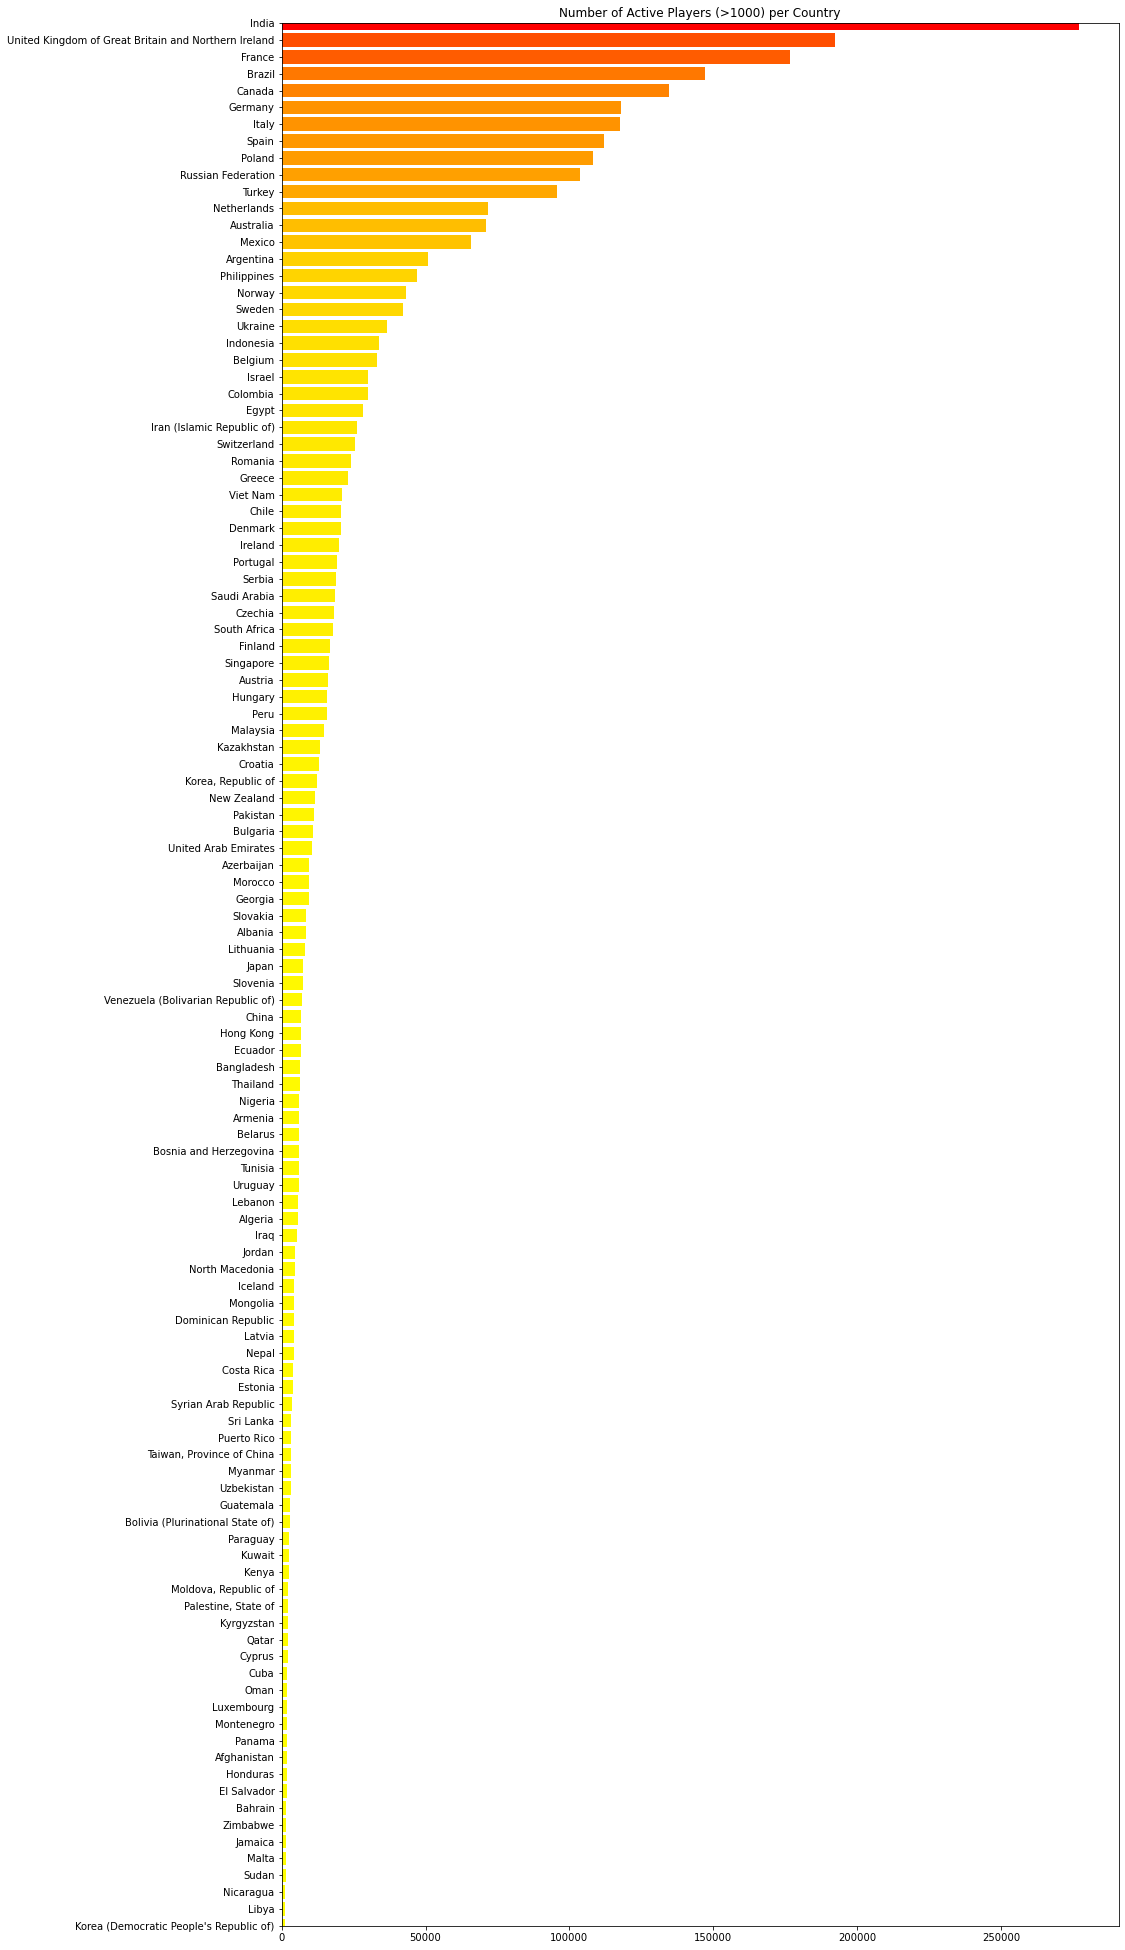

In [14]:
country = count_sorted_cleaned["Country"]
count = count_sorted_cleaned["Player Count"]

cmap = mcolors.LinearSegmentedColormap.from_list("", ["yellow", "red"])

fig = plt.figure(figsize=(15,35))
plt.barh(country, count, align='center', color=cmap(count.values/count.values.max()))
plt.ylim('India', "Korea (Democratic People's Republic of)")
plt.title("Number of Active Players (>1000) per Country")
plt.gca().invert_yaxis()
plt.savefig("figures/figure6_player_count", dpi=100)
plt.show()

In [5]:
#set country population csv file path & read csv
file = os.path.join('resources/country_population_data.csv')
population = pd.read_csv(file)
population

#Create data frame with countries and 2019 population 
current_pop = population["2019"]
country = population["Country Name"]
pop_df = pd.DataFrame({"Country": country, 
                       "Population (2019)": current_pop}) 

#Edit United Kingdom to match the country player count 
pop_df["Country"] = pop_df["Country"].str.replace("United Kingdom", 
                                                  "United Kingdom of Great Britain and Northern Ireland")
pop_df.head(10)

,Country,Population (2019)
0,Aruba,106314.0
1,Afghanistan,38041754.0
2,Angola,31825295.0
3,Albania,2854191.0
4,Andorra,77142.0
5,Arab World,427870270.0
6,United Arab Emirates,9770529.0
7,Argentina,44938712.0
8,Armenia,2957731.0
9,American Samoa,55312.0


In [9]:
#Merge country player count and country population data frames
chess_countries_merge = pop_df.merge(count_sorted_cleaned, on='Country')
chess_player_pop = chess_countries_merge.sort_values(by="Player Count", ascending=False).reset_index(drop=True)

chess_player_pop["Population (2019)"] = chess_player_pop["Population (2019)"].astype(int)
chess_player_pop.head(10)

,Country,Population (2019),Country Code,Player Count
0,India,1366417754,IN,276922
1,United Kingdom of Great Britain and Northern I...,66834405,GB,192118
2,France,67059887,FR,176560
3,Brazil,211049527,BR,147040
4,Canada,37589262,CA,134687
5,Germany,83132799,DE,117887
6,Italy,60297396,IT,117604
7,Spain,47076781,ES,112180
8,Poland,37970874,PL,108111
9,Russian Federation,144373535,RU,103656


In [10]:
#Percentage of country population on chess.com
chess_player_pop["Percent of Population"] = chess_player_pop["Player Count"]/chess_player_pop["Population (2019)"]
chess_player_pop["Percent of Population"] = chess_player_pop["Percent of Population"].map("{:,.2%}".format)
chess_player_pop.head(10)

,Country,Population (2019),Country Code,Player Count,Percent of Population
0,India,1366417754,IN,276922,0.02%
1,United Kingdom of Great Britain and Northern I...,66834405,GB,192118,0.29%
2,France,67059887,FR,176560,0.26%
3,Brazil,211049527,BR,147040,0.07%
4,Canada,37589262,CA,134687,0.36%
5,Germany,83132799,DE,117887,0.14%
6,Italy,60297396,IT,117604,0.20%
7,Spain,47076781,ES,112180,0.24%
8,Poland,37970874,PL,108111,0.28%
9,Russian Federation,144373535,RU,103656,0.07%


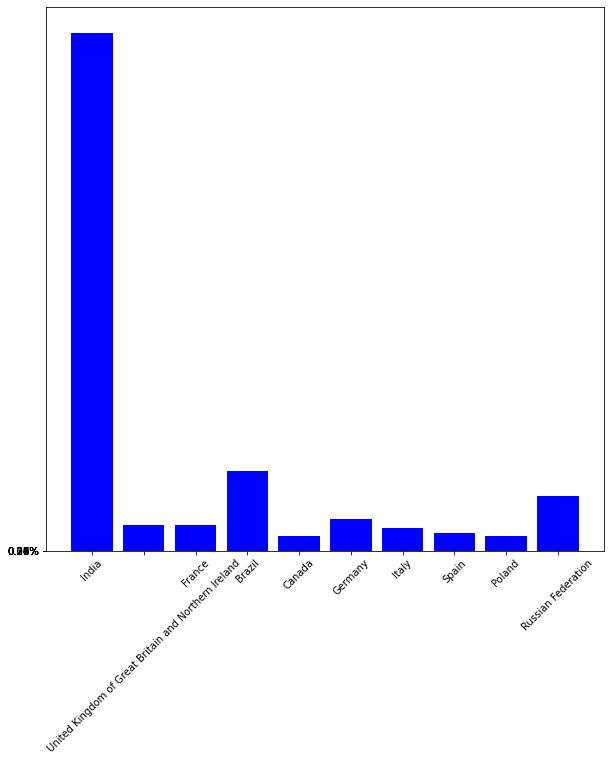

In [11]:
#Create stacked bar chart showing percent of population for top 10 countries 
country = chess_player_pop.head(10)["Country"]
pop_total = chess_player_pop.head(10)["Population (2019)"]
percent_pop = chess_player_pop.head(10)["Percent of Population"]

fig = plt.figure(figsize=(10,10))
plt.bar(country, percent_pop, align='center', color='red')
plt.bar(country, pop_total, align='center', color='blue')
plt.xticks(rotation=45)
plt.show()